## 페이스북 모임

https://www.facebook.com/financedata/

##  시가총액

https://github.com/FinanceData/marcap

## 튜터리얼 문서

https://nbviewer.jupyter.org/github/FinanceData/marcap/blob/master/marcap-tutorial.ipynb

## 예제 14-3-1 시가총액 데이터 가져오기 

## 컬럼 구성

- Date (날짜)를 인덱스(DatetimeIndex)로 포함하고 있으며, 컬럼 구성은 다음과 같습니다.

- Date : 날짜 (DatetimeIndex)
- Code : 종목코드
- Name : 종명이름
- Open : 시가
- High : 고가
- Low : 저가
- Close : 종가
- Volume : 거래량
- Amount : 거래대금
- Changes : 전일대비
- ChagesRatio : 전일비
- Marcap : 시가총액(백만원)
- Stocks : 상장주식수
- MarcapRatio : 시가총액비중(%)
- ForeignShares : 외국인 보유주식수
- ForeignRatio : 외국인 지분율(%)
- Rank: 시가총액 순위 (당일)

In [70]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys


from matplotlib import font_manager, rc

if sys.platform  == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'  
elif sys.platform == 'win32':
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [71]:
import seaborn as sns                        ## 시각화 데이터 모듈을 사용한다 
sns.set(font_scale=1.5)                  ## 폰트 사이즈 지정 

In [3]:
import pandas as pd                                    ## 판다스 모듈을 사용한다 

In [4]:
from marcap import marcap_date, marcap_date_range               ## 주가총액에 대한 데이터를 가져오는 모듈을 사용한다 

In [5]:
df = marcap_date('2019-05-02')                                    ## 2019년 5월 2일 데이터를 가져온다 

In [6]:
df.columns

Index(['Code', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume', 'Amount',
       'Changes', 'ChagesRatio', 'Marcap', 'Stocks', 'MarcapRatio',
       'ForeignShares', 'ForeignRatio', 'Rank'],
      dtype='object')

In [7]:
df.shape

(2275, 16)

In [8]:
df.index.unique()

DatetimeIndex(['2019-05-02'], dtype='datetime64[ns]', name='Date', freq=None)

In [9]:
df.head()[['Code', 'Name', 'Rank']]                   ## 특정 열 3개만 검색한다 

,Code,Name,Rank
Date,,,
2019-05-02,005930,삼성전자,1.0
2019-05-02,000660,SK하이닉스,2.0
2019-05-02,005935,삼성전자우,3.0
2019-05-02,005380,현대차,4.0
2019-05-02,068270,셀트리온,5.0


In [10]:
df_ = marcap_date_range('2018-01-01', '2018-12-31')           ## 2018년 데이터를 읽어온다 

In [11]:
df_.head()[['Code', 'Name', 'Rank']]

,Code,Name,Rank
Date,,,
2018-01-02,005930,삼성전자,1.0
2018-01-02,000660,SK하이닉스,2.0
2018-01-02,005935,삼성전자우,3.0
2018-01-02,005380,현대차,4.0
2018-01-02,005490,POSCO,5.0


In [12]:
df_005930 = marcap_date_range('2018-01-01', '2018-12-31', '005930')       ## 특정 주식만 읽어온다 

In [13]:
df_005930.head()[['Code', 'Name', 'Rank']]

,Code,Name,Rank
Date,,,
2018-01-02,005930,삼성전자,1.0
2018-01-03,005930,삼성전자,1.0
2018-01-04,005930,삼성전자,1.0
2018-01-05,005930,삼성전자,1.0
2018-01-08,005930,삼성전자,1.0


In [14]:
df_005930['Rank'].value_counts()

1.0    241
Name: Rank, dtype: int64

In [15]:
df_24year = marcap_date_range('1995-05-02', '2019-04-30')         ## 특정 일자로 정보를 가져온다 

In [16]:
df_24year.head()[['Code', 'Name', 'Rank']]

,Code,Name,Rank
Date,,,
1995-05-02,015760,한국전력공사,1.0
1995-05-02,005930,삼성전자,2.0
1995-05-02,005490,포항종합제철,3.0
1995-05-02,000200,대우중공업,4.0
1995-05-02,002610,엘지전자,5.0


In [17]:
import pandas as pd

df = pd.read_csv('marcap/data/marcap-2018.csv.gz',
                 dtype={'Code':str}, parse_dates=['Date'])         ## 특정 파일의 정보를 직접 읽어온다 
df.head(5)[['Code', 'Name', 'Rank']]

,Code,Name,Rank
0,005930,삼성전자,1
1,000660,SK하이닉스,2
2,005935,삼성전자우,3
3,005380,현대차,4
4,005490,POSCO,5


In [18]:
df_24year_096770 = marcap_date_range('1995-05-02', 
                                     '2019-04-30',
                                     '096770')            ## 특정 종목의 장기 데이터를 읽어온다 

In [19]:
df_24year_096770 .head()[['Code', 'Name', 'Rank']]

,Code,Name,Rank
Date,,,
2007-07-25,096770,SK에너지,11.0
2007-07-26,096770,SK에너지,12.0
2007-07-27,096770,SK에너지,12.0
2007-07-30,096770,SK에너지,12.0
2007-07-31,096770,SK에너지,12.0


In [20]:
df_24year_096770 .head()[['Code', 'Name', 'Rank','Marcap']]      ## 시장가치 금액도 조회한다 

,Code,Name,Rank,Marcap
Date,,,,
2007-07-25,096770,SK에너지,11.0,1.548781e+13
2007-07-26,096770,SK에너지,12.0,1.370602e+13
2007-07-27,096770,SK에너지,12.0,1.352328e+13
2007-07-30,096770,SK에너지,12.0,1.439133e+13
2007-07-31,096770,SK에너지,12.0,1.434564e+13


In [21]:
df_24year_096770['Marcap'].describe()

count    2.908000e+03
mean     1.338646e+13
std      3.582748e+12
min      4.498450e+12
25%      1.041303e+13
50%      1.359244e+13
75%      1.590408e+13
max      2.348625e+13
Name: Marcap, dtype: float64

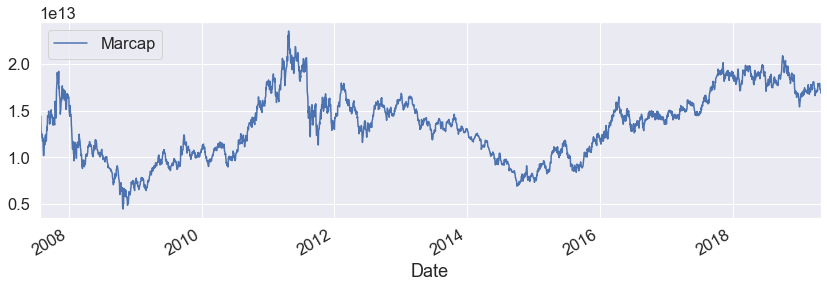

In [22]:
plt.rcParams["figure.figsize"] = (14,4)                 ## 그래프의 크기를 조정한다 
df_24year_096770[['Marcap']].plot()                     ## 시가총액 금액을 확인한다 

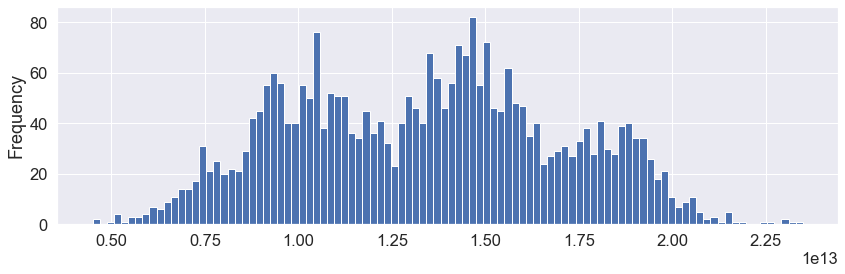

In [23]:
df_24year_096770['Marcap'].plot(kind='hist', bins=100)       ## 시가총액을 히스토그램 그래프를 그린다 

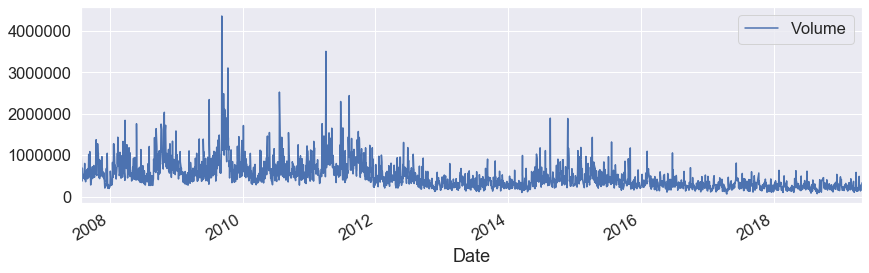

In [24]:
df_24year_096770[['Volume']].plot()

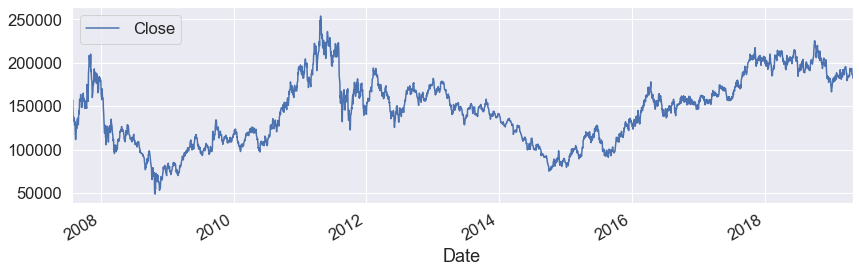

In [25]:
df_24year_096770[['Close']].plot()

In [26]:
df_24year_096770['Rank'].mean()                     ## 시가총액 순위의 평균을 확인한다 

17.85075653370014

In [27]:
df_24year_096770['Rank'].min(), df_24year_096770['Rank'].max()       ## 시가총액 순위의 최소값과 최대값을 구한다 

(7.0, 38.0)

In [28]:
df_24year_096770['Rank'][ df_24year_096770['Rank'] == 38 ]           ## 시가총액이 가장 낮은 때를 확인한다 

Date
2014-10-01    38.0
2014-10-02    38.0
2014-10-06    38.0
2014-10-07    38.0
2014-10-08    38.0
2014-10-10    38.0
2014-10-22    38.0
2014-10-23    38.0
2015-01-06    38.0
Name: Rank, dtype: float64

In [29]:
df_24year_096770['Rank'][ df_24year_096770['Rank'] == 7 ]          ## 시각총액이 가장 높을 때를 확인한다 

Date
2007-10-26    7.0
2007-10-29    7.0
2007-10-30    7.0
2007-10-31    7.0
Name: Rank, dtype: float64

In [30]:
df_24year_096770['Rank'].value_counts().head()            ## 시간총액의 순위이 발생 건수를 확인한다 

18.0    355
19.0    318
16.0    284
13.0    244
17.0    219
Name: Rank, dtype: int64

In [31]:
df_24year_096770['Rank'].value_counts().tail()

36.0    9
8.0     8
28.0    8
37.0    7
7.0     4
Name: Rank, dtype: int64

In [32]:
wti_df = pd.read_excel("https://www.eia.gov/dnav/pet/hist_xls/RWTCd.xls", 
                       sheet_name="Data 1",
                       skiprows=2, 
                       names=['Date', 'WTI'])             ## 석유가격 정보를 읽는다 

In [33]:
wti_df = wti_df.fillna(0)

In [34]:
wti_df = wti_df.set_index("Date") 

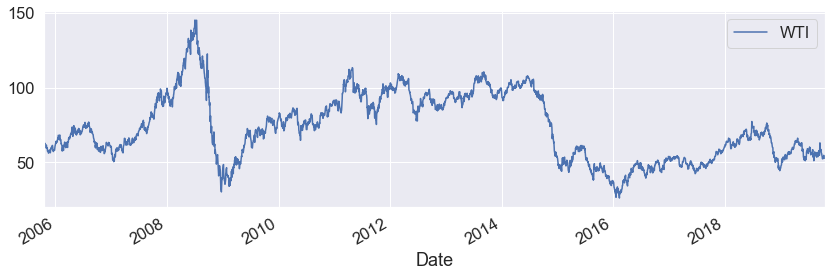

In [35]:
wti_df.iloc[5000:, ].plot()                               ## 시각총액의 선 그래프를 그린다 
                                                          ## 2014년이후에 석유가격이 급속하게 떨어진다. 이때 시가 총액의 순위가 낮아진다 


 ## 에너지 가격 하락 
    
    http://www.dt.co.kr/contents.html?article_no=2015020502109932102010

## 예제 14-3-2 특정 주식에 대한 시장 참여 비율 알아보기

In [36]:
fav_stocks = {
  '005930': '삼성전자', 
  '005380': '현대차', 
  '015760': '한국전력', 
  '005490': 'POSCO', 
  '105560': 'KB금융',
}

In [37]:
df_stocks = df_24year[df_24year['Code'].isin(fav_stocks.keys())]          ## 특정 5개 업체의 시가총액을 조회한다 
df_stocks[df_stocks.columns[:5]].head()

,Code,Name,Close,Changes,ChagesRatio
Date,,,,,
1995-05-02,015760,한국전력공사,27400.0,-400.0,-1.4
1995-05-02,005930,삼성전자,119500.0,-1000.0,-0.8
1995-05-02,005490,포항종합제철,65500.0,-300.0,-0.5
1995-05-02,005380,현대자동차,46200.0,-300.0,-0.6
1995-05-03,015760,한국전력공사,29000.0,1600.0,5.8


In [38]:
df_stocks.shape

(26984, 16)

## 외국인 지분율

In [39]:
pivoted = df_stocks.pivot_table(index='Date', 
                                columns='Code', 
                                values='ForeignRatio')
pivoted.tail(10)                                            ## 외국인 지분을 확인하기 위해 피봇테이블로 변경한다 

Code,005380,005490,005930,015760,105560
Date,,,,,
2019-04-17,44.62,55.07,57.25,28.18,66.96
2019-04-18,44.70,55.09,57.20,28.16,67.00
2019-04-19,44.71,54.96,57.16,28.12,67.00
2019-04-22,44.71,54.94,57.19,28.08,67.01
2019-04-23,44.74,54.93,57.21,28.08,67.08
2019-04-24,44.75,54.92,57.24,28.07,67.14
2019-04-25,44.75,54.95,57.22,28.04,67.15
2019-04-26,44.77,54.92,57.24,28.00,67.25
2019-04-29,44.79,54.87,57.25,27.92,67.26


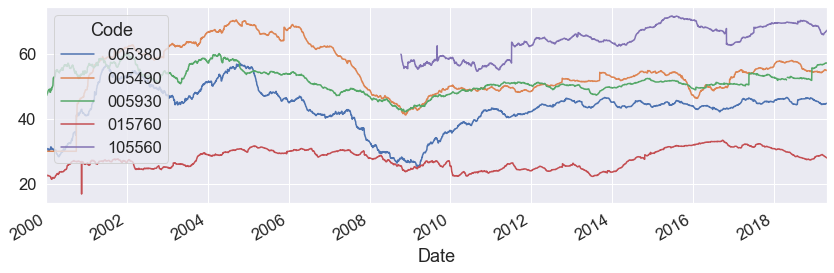

In [40]:
pivoted.plot()                              ## 외국인 지분율 변화를 확인한다. 

In [68]:
import warnings
warnings.filterwarnings(action='ignore')

In [75]:
import matplotlib.pyplot as plt
import sys


from matplotlib import font_manager, rc

if sys.platform  == 'darwin':
    path = '/Library/Fonts/AppleGothic.ttf'  
elif sys.platform == 'win32':
    path = "c:/Windows/Fonts/malgun.ttf"
else:
    print('Unknown system... sorry~~~~') 
    
font_name = font_manager.FontProperties(fname=path).get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

plt.rcParams["figure.figsize"] = (14,4)                 ## 그래프의 크기를 조정한다 

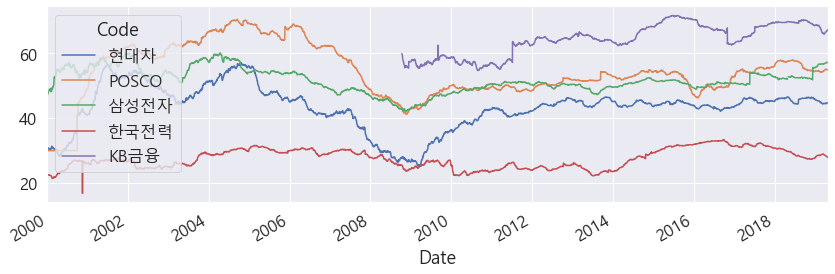

In [76]:
pivoted.rename(columns=fav_stocks, inplace=True)
pivoted.plot()

In [43]:
marcap_ratio = df_stocks.pivot_table(index='Date', 
                                     columns='Code', 
                                     values='MarcapRatio')

marcap_ratio = marcap_ratio['2001-06-11':]
marcap_ratio.rename(columns=fav_stocks, inplace=True)
marcap_ratio.tail(5)

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
2019-04-24,1.71,1.31,15.48,1.05,1.10
2019-04-25,1.72,1.32,15.53,1.04,1.11
2019-04-26,1.70,1.30,15.69,1.05,1.11
2019-04-29,1.71,1.29,15.89,1.06,1.12
2019-04-30,1.71,1.29,15.85,1.05,1.12


In [44]:
marcap_ratio.loc['2019-04-30']

Code
현대차       1.71
POSCO     1.29
삼성전자     15.85
한국전력      1.05
KB금융      1.12
Name: 2019-04-30 00:00:00, dtype: float64

In [45]:
marcap_ratio.loc['November 1, 2016']

Code
현대차       2.11
POSCO     1.40
삼성전자     15.70
한국전력      2.14
KB금융      1.18
Name: 2016-11-01 00:00:00, dtype: float64

In [46]:
marcap_ratio.loc['2016-Nov-1']

Code
현대차       2.11
POSCO     1.40
삼성전자     15.70
한국전력      2.14
KB금융      1.18
Name: 2016-11-01 00:00:00, dtype: float64

In [47]:
marcap_ratio.loc['2016-11'].head()

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
2016-11-01,2.11,1.40,15.70,2.14,1.18
2016-11-02,2.11,1.40,15.87,2.16,1.18
2016-11-03,2.06,1.42,15.57,2.14,1.17
2016-11-04,2.05,1.42,15.68,2.08,1.16
2016-11-07,2.05,1.44,15.66,2.00,1.16


In [48]:
marcap_ratio.loc['2016'].head()

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
2016-01-04,2.23,1.01,12.50,2.26,0.88
2016-01-05,2.21,1.03,12.45,2.28,0.88
2016-01-06,2.16,1.03,12.13,2.29,0.88
2016-01-07,2.15,1.01,12.14,2.29,0.88
2016-01-08,2.12,1.01,12.15,2.26,0.87


In [49]:
marcap_ratio.loc['2017-11-02' : '2017-12-01'].head()

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
2017-11-02,1.85,1.48,19.45,1.29,1.30
2017-11-03,1.86,1.49,19.05,1.32,1.31
2017-11-06,1.83,1.46,19.08,1.30,1.27
2017-11-07,1.79,1.48,19.01,1.29,1.27
2017-11-08,1.79,1.44,19.16,1.29,1.26


In [50]:
marcap_ratio.loc['2017-11-02 23:00' : '2017-12-01'].count()

Code
현대차      21
POSCO    21
삼성전자     21
한국전력     21
KB금융     21
dtype: int64

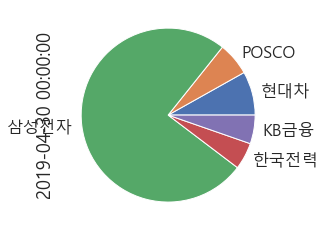

In [77]:
marcap_ratio.loc['2019-04-30'].plot.pie()

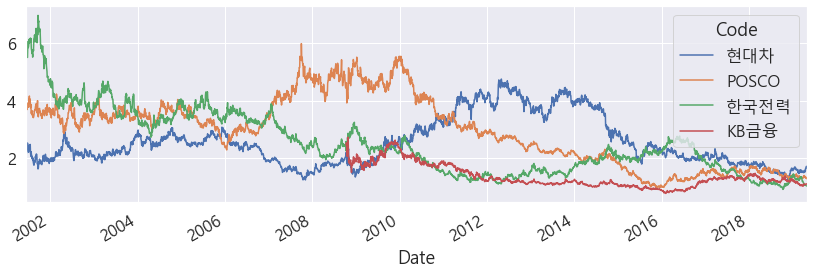

In [78]:
cols = ['현대차', 'POSCO', '한국전력', 'KB금융']
marcap_ratio[cols].plot()

## 주기를 문자열로 처리
min, T	minute
H	hour
D	day
B	business day
W	week
M	month
Q	quarter
A	year

In [53]:
marcap_ratio.resample('M').mean().head()           ## 특정 월 단위의 평균을 구한다 

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
2001-06-30,2.336667,3.731333,11.759333,5.678000,NaN
2001-07-31,2.263810,3.859524,11.378095,5.983333,NaN
2001-08-31,1.932273,3.576818,11.958636,5.940455,NaN
2001-09-30,1.896500,3.708500,11.794000,6.427500,NaN
2001-10-31,1.872000,3.543500,11.048000,5.981000,NaN


In [54]:
marcap_ratio.resample('Y').mean().head()                 ## 특정 년단위의 평균을 구한다 

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
2001-12-31,2.025180,3.665324,11.869281,5.752446,NaN
2002-12-31,2.223033,3.401434,15.044508,4.018730,NaN
2003-12-31,2.229555,3.545870,17.342713,3.942389,NaN
2004-12-31,2.659478,3.572008,17.530241,3.328072,NaN
2005-12-31,2.669920,3.228153,14.493012,3.680522,NaN


In [55]:
marcap_ratio.resample('A').mean().head()               ## 연도말 기준으로 평균을 구한다 

Code,현대차,POSCO,삼성전자,한국전력,KB금융
Date,,,,,
2001-12-31,2.025180,3.665324,11.869281,5.752446,NaN
2002-12-31,2.223033,3.401434,15.044508,4.018730,NaN
2003-12-31,2.229555,3.545870,17.342713,3.942389,NaN
2004-12-31,2.659478,3.572008,17.530241,3.328072,NaN
2005-12-31,2.669920,3.228153,14.493012,3.680522,NaN


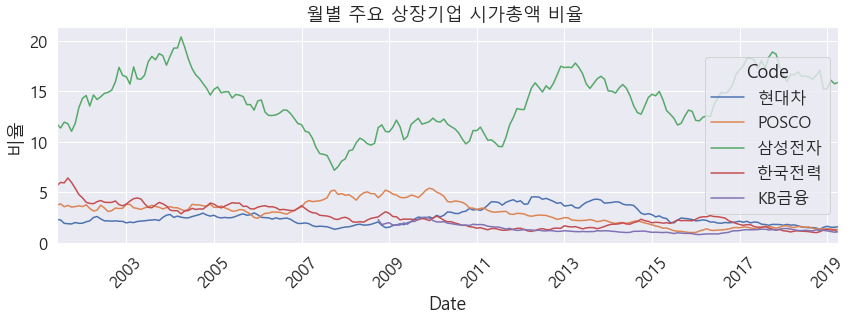

In [79]:
df_plot = marcap_ratio.resample('M').mean()               ## 월 평균을 기준으로 그래프를 글니다 
df_plot.plot()
plt.title('월별 주요 상장기업 시가총액 비율 ')
plt.ylabel('비율')
plt.xticks(rotation=45)
plt.show()

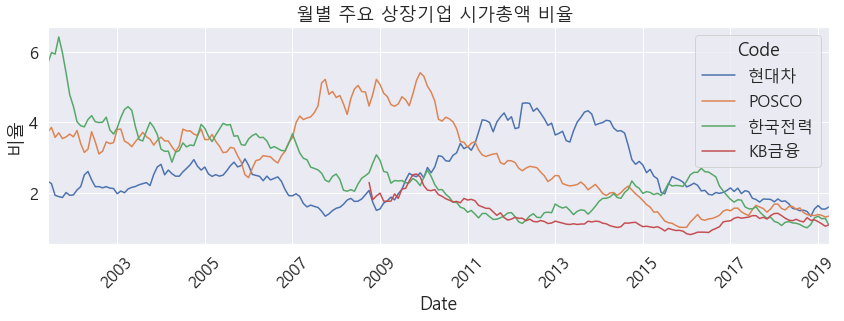

In [80]:
df_plot = marcap_ratio[cols].resample('M').mean()             ## 삼성전자를 빼고 나머지 4개 기업만 그래프를 그린다 
df_plot.plot()
plt.title('월별 주요 상장기업 시가총액 비율 ')
plt.ylabel('비율')
plt.xticks(rotation=45)
plt.show()

In [58]:
marcap_ratio.describe()

Code,현대차,POSCO,삼성전자,한국전력,KB금융
count,4422.000000,4422.000000,4419.000000,4422.000000,2610.000000
mean,2.564107,2.975269,13.961451,2.525473,1.365962
std,0.833882,1.176049,2.820397,1.107386,0.397044
min,1.220000,0.990000,6.830000,0.920000,0.780000
25%,1.940000,1.930000,11.850000,1.570000,1.110000
50%,2.380000,3.090000,14.280000,2.290000,1.230000
75%,2.950000,3.740000,16.180000,3.370000,1.597500
max,4.750000,5.980000,20.860000,6.960000,2.730000


## 예제 14-3-3 특정 산업별로 분류해보기

In [59]:
import FinanceDataReader as fdr

df_master = fdr.StockListing('KRX')               ## 주식 종목을 가져온다 
df_master.head()

,Symbol,Name,Sector,Industry
0,155660,DSR,1차 비철금속 제조업,합섬섬유로프
1,001250,GS글로벌,상품 종합 도매업,"수출입업(시멘트,철강금속,전기전자,섬유,기계화학),상품중개,광업,채석업/하수처리 서..."
2,082740,HSD엔진,일반 목적용 기계 제조업,"대형선박용엔진,내연발전엔진"
3,011070,LG이노텍,전자부품 제조업,기타 전자부품 제조업
4,010060,OCI,기초 화학물질 제조업,"타르제품,카본블랙,무수프탈산,농약원제,석탄화학제품,정밀화학제품,플라스틱창호재 제조,판매"


In [60]:
df_master[['Symbol', 'Sector']].head(10)       ## 주식코드와 섹터 정보를 가졍온다 

,Symbol,Sector
0,155660,1차 비철금속 제조업
1,001250,상품 종합 도매업
2,082740,일반 목적용 기계 제조업
3,011070,전자부품 제조업
4,010060,기초 화학물질 제조업
5,001740,기타 전문 도매업
6,096770,석유 정제품 제조업
7,011810,상품 종합 도매업
8,024070,플라스틱제품 제조업
9,011420,스포츠 서비스업


In [61]:
df_marcap = marcap_date('2019-04-30')

df_marcap[['Code', 'Name', 'Marcap']].head(10)            

,Code,Name,Marcap
Date,,,
2019-04-30,005930,삼성전자,2.737145e+14
2019-04-30,000660,SK하이닉스,5.751219e+13
2019-04-30,005935,삼성전자우,3.061139e+13
2019-04-30,005380,현대차,2.959304e+13
2019-04-30,068270,셀트리온,2.712614e+13
2019-04-30,051910,LG화학,2.548384e+13
2019-04-30,012330,현대모비스,2.263245e+13
2019-04-30,207940,삼성바이오로직스,2.249610e+13
2019-04-30,005490,POSCO,2.223264e+13


In [62]:
df_merge = pd.merge(df_marcap[['Code', 'Name', 'Marcap']], 
                    df_master[['Symbol', 'Sector']], 
                    left_on='Code', right_on="Symbol")            ## 주식 코드를 기준으로 데이터를 합친다 

print('row count:', len(df_merge))
df_merge.head()

row count: 2153


,Code,Name,Marcap,Symbol,Sector
0,005930,삼성전자,2.737145e+14,005930,통신 및 방송 장비 제조업
1,000660,SK하이닉스,5.751219e+13,000660,반도체 제조업
2,005380,현대차,2.959304e+13,005380,자동차용 엔진 및 자동차 제조업
3,068270,셀트리온,2.712614e+13,068270,기초 의약물질 및 생물학적 제제 제조업
4,051910,LG화학,2.548384e+13,051910,기초 화학물질 제조업


In [63]:
df_sector_counts = df_merge['Sector'].value_counts()[:10]         ## 섹터별로 주식 종목을 확인한다 
df_sector_counts

특수 목적용 기계 제조업     122
소프트웨어 개발 및 공급업    117
전자부품 제조업          109
자동차 신품 부품 제조업      91
의약품 제조업            85
기타 금융업             84
기타 화학제품 제조업        76
통신 및 방송 장비 제조업     66
금융 지원 서비스업         59
1차 철강 제조업          56
Name: Sector, dtype: int64

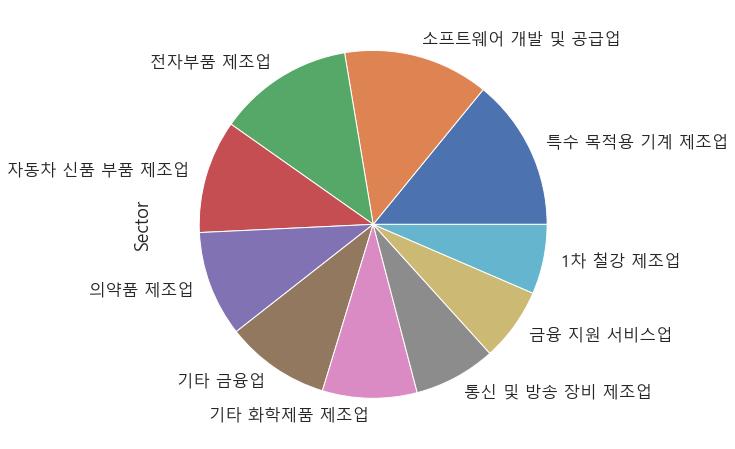

In [81]:
df_sector_counts.plot.pie(figsize=(8, 8))               ## 파이 그래프를 그린다 

## 섹터별 합산 금액

In [65]:
df_merge.groupby('Sector').sum().head()            ## 섹터별로 합산을 구한다 

,Marcap
Sector,
1차 비철금속 제조업,1.213341e+13
1차 철강 제조업,3.679909e+13
가구 제조업,1.470725e+12
가전제품 및 정보통신장비 소매업,1.122547e+12
가정용 기기 제조업,1.680621e+12


## 역순으로 정렬 

In [66]:
df_sector_corp_marcap = df_merge.groupby('Sector').sum().sort_values('Marcap', ascending=False)[:20]
df_sector_corp_marcap.head()                  ## 섹터단위의 합산을 구한 후에 정렬을 한다 

,Marcap
Sector,
통신 및 방송 장비 제조업,2.947758e+14
기타 금융업,1.500823e+14
기초 의약물질 및 생물학적 제제 제조업,6.786715e+13
반도체 제조업,6.620030e+13
기타 화학제품 제조업,6.504587e+13


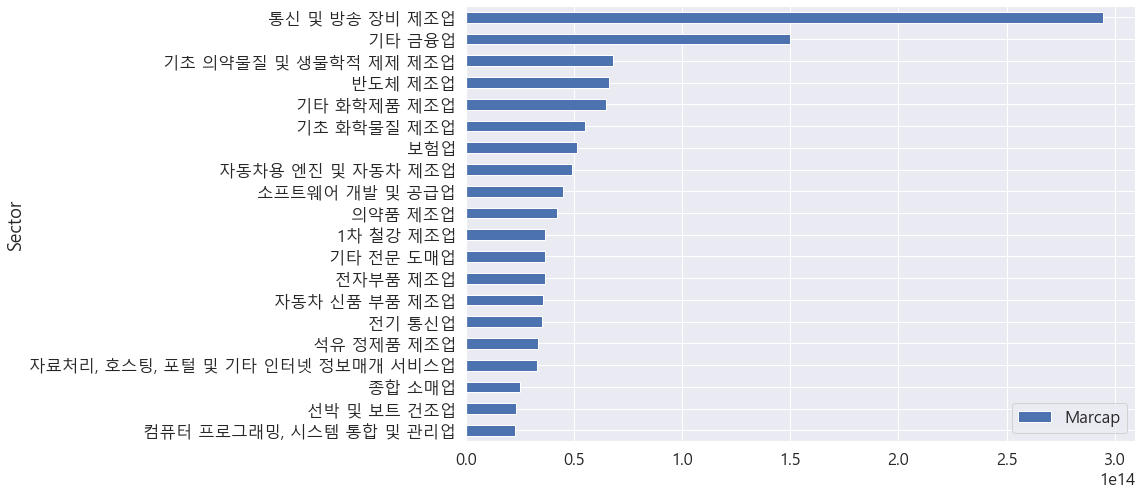

In [82]:
df_sector_corp_marcap[::-1].plot(kind='barh', 
                                 figsize=(12, 8))          ## 수평으로 막대그래프를 그린다 